In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [ ]:
root = '/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/'

In [ ]:
df_list = {}
for filename in glob.glob(os.path.join(root, '*isro.csv')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
      print(f.name)
      df_list[str(str((f.name.split('/')[-1]).lower()).split('_')[0])] = pd.read_csv(f)

/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/west_bengal_isro.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/himachal_pradesh_isro.csv


In [ ]:
df_list

{'himachal':                               @STATION_ID  ...  BATTERY_VOLTAGE(V)
 0      IMDD3772_0B6EBC(UNI_MASHOBR_SIMLA)  ...              9953.0
 1      IMDD3772_0B6EBC(UNI_MASHOBR_SIMLA)  ...              9953.0
 2      IMDD3772_0B6EBC(UNI_MASHOBR_SIMLA)  ...              9953.0
 3      IMDD3772_0B6EBC(UNI_MASHOBR_SIMLA)  ...              9953.0
 4      IMDD3772_0B6EBC(UNI_MASHOBR_SIMLA)  ...              9953.0
 ...                                   ...  ...                 ...
 89929       IMDE1616_141650(SEOBAGH_AGRO)  ...              9953.0
 89930       IMDE1616_141650(SEOBAGH_AGRO)  ...              9953.0
 89931       IMDE1616_141650(SEOBAGH_AGRO)  ...              9953.0
 89932       IMDE1616_141650(SEOBAGH_AGRO)  ...              9953.0
 89933       IMDE1616_141650(SEOBAGH_AGRO)  ...              9953.0
 
 [89934 rows x 16 columns],
 'west':                                          @STATION_ID  ...  BATTERY_VOLTAGE(V)
 0               ISRO0012_15F00C(RRSSC IIT Kharagpur)  

In [ ]:
df = df_list['himachal']
df.describe()

,LATITUDE,LONGITUDE,ALTITUDE(m),TIME(GMT),AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),BATTERY_VOLTAGE(V)
count,89934.000000,89934.000000,0.0,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000
mean,31.580306,76.968596,NaN,11.589354,24.044404,1.880003,192.287781,886.722833,65.130693,2.590083,9869.131302
std,0.581344,0.489872,NaN,7.031920,75.054215,81.416404,142.457914,86.595262,92.117219,80.829989,909.116140
min,30.330000,76.010000,NaN,0.000000,-39.100000,0.000000,0.000000,690.600000,0.000000,0.000000,9.100000
25%,31.117000,76.753000,NaN,5.000000,23.000000,0.500000,104.100000,850.000000,42.000000,0.000000,9953.000000
50%,31.500000,77.020000,NaN,12.000000,25.800000,0.900000,201.900000,924.200000,64.000000,0.000000,9953.000000
75%,32.199000,77.112000,NaN,18.000000,28.500000,1.600000,279.100000,940.400000,99.000000,0.000000,9953.000000
max,32.700000,78.160000,NaN,23.000000,9999.900000,9999.900000,9999.900000,9907.000000,9999.900000,9999.900000,9999.900000


In [ ]:
df['DATE'] = df['DATE(IST)'] + " " + df['TIME(IST)']
df['Datetime'] = pd.to_datetime(df['DATE'])

In [ ]:
df['SUN_SHINE(hh:mm)'] =  pd.Series(df['SUN_SHINE(hh:mm)'], dtype="string")

In [ ]:
df['SUN_SHINE(hh:mm)'].replace({'9999.9': '0:00', '9914.0' : '0:00'}, inplace=True)

In [ ]:
sunshine = []
for i in df['SUN_SHINE(hh:mm)']:
  sunshine_split = i.split(':')
  hrs = int(sunshine_split[0])
  minutes = int(sunshine_split[1])
  sunshine.append(hrs * 60 + minutes)
df['SUN_SHINE(min)'] =  pd.Series(sunshine)

In [ ]:
df = df.drop(columns=['@STATION_ID','ALTITUDE(m)','DATE' ,'SUN_SHINE(hh:mm)','BATTERY_VOLTAGE(V)','TIME(GMT)', 'DATE(GMT)', 'TIME(IST)', 'DATE(IST)', 'LATITUDE', 'LONGITUDE'])

In [ ]:
df

,AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),Datetime,SUN_SHINE(min)
0,25.2,3.0,118.8,926.9,50.0,0.0,2015-11-01 05:30:00,0
1,25.3,3.0,122.2,927.4,50.0,0.0,2015-11-01 06:30:00,0
2,25.0,0.5,130.0,928.0,50.0,0.0,2015-11-01 07:30:00,0
3,26.9,0.2,211.1,928.5,50.0,0.0,2015-11-01 08:30:00,0
4,27.6,1.5,114.9,928.9,50.0,0.0,2015-11-01 09:30:00,0
...,...,...,...,...,...,...,...,...
89929,26.7,2.6,17.1,850.0,63.0,0.0,2019-01-02 06:30:00,326
89930,26.4,2.8,26.9,850.0,71.0,0.0,2019-01-02 07:30:00,326
89931,26.2,3.0,349.0,850.0,77.0,0.0,2019-01-02 08:30:00,326
89932,26.4,1.8,35.2,850.0,78.0,0.0,2019-01-02 09:30:00,327


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfab8d0ad0>,
      dtype=object)

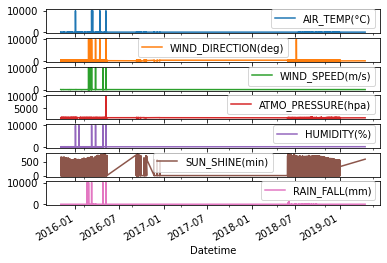

In [ ]:
df.set_index('Datetime')[['AIR_TEMP(°C)','WIND_DIRECTION(deg)' ,'WIND_SPEED(m/s)','ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'SUN_SHINE(min)', 'RAIN_FALL(mm)']].plot(subplots=True)

In [ ]:
df.describe()

,AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),SUN_SHINE(min)
count,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000,89934.000000
mean,24.044404,1.880003,192.287781,886.722833,65.130693,2.590083,130.486501
std,75.054215,81.416404,142.457914,86.595262,92.117219,80.829989,228.581547
min,-39.100000,0.000000,0.000000,690.600000,0.000000,0.000000,0.000000
25%,23.000000,0.500000,104.100000,850.000000,42.000000,0.000000,0.000000
50%,25.800000,0.900000,201.900000,924.200000,64.000000,0.000000,0.000000
75%,28.500000,1.600000,279.100000,940.400000,99.000000,0.000000,332.000000
max,9999.900000,9999.900000,9999.900000,9907.000000,9999.900000,9999.900000,790.000000


In [ ]:
df.dtypes

AIR_TEMP(°C)                  float64
WIND_SPEED(m/s)               float64
WIND_DIRECTION(deg)           float64
ATMO_PRESSURE(hpa)            float64
HUMIDITY(%)                   float64
RAIN_FALL(mm)                 float64
Datetime               datetime64[ns]
SUN_SHINE(min)                  int64
dtype: object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfaa975710>,
      dtype=object)

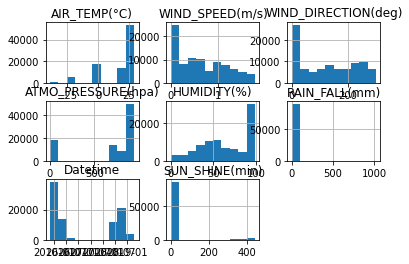

In [ ]:
for i in df.columns:
  if(i == 'RAIN_FALL(mm)'):
    a = df[i] > 2000
    df[i][a] = 0
  elif (i == 'Datetime'):
    continue
  else:
    a = df[i].quantile(0.80)
    b = df[i] > a
    df[i][b] = 0
df.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfaa5a3e90>,
      dtype=object)

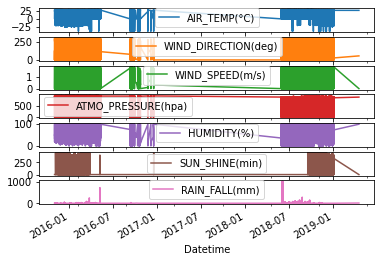

In [ ]:
df.set_index('Datetime')[['AIR_TEMP(°C)','WIND_DIRECTION(deg)' ,'WIND_SPEED(m/s)','ATMO_PRESSURE(hpa)', 'HUMIDITY(%)', 'SUN_SHINE(min)', 'RAIN_FALL(mm)']].plot(subplots=True)

In [ ]:
df.head()

,AIR_TEMP(°C),WIND_SPEED(m/s),WIND_DIRECTION(deg),ATMO_PRESSURE(hpa),HUMIDITY(%),RAIN_FALL(mm),Datetime,SUN_SHINE(min)
0,25.2,0.0,118.8,926.9,50.0,0.0,2015-11-01 05:30:00,0
1,25.3,0.0,122.2,927.4,50.0,0.0,2015-11-01 06:30:00,0
2,25.0,0.5,130.0,928.0,50.0,0.0,2015-11-01 07:30:00,0
3,26.9,0.2,211.1,928.5,50.0,0.0,2015-11-01 08:30:00,0
4,27.6,1.5,114.9,928.9,50.0,0.0,2015-11-01 09:30:00,0


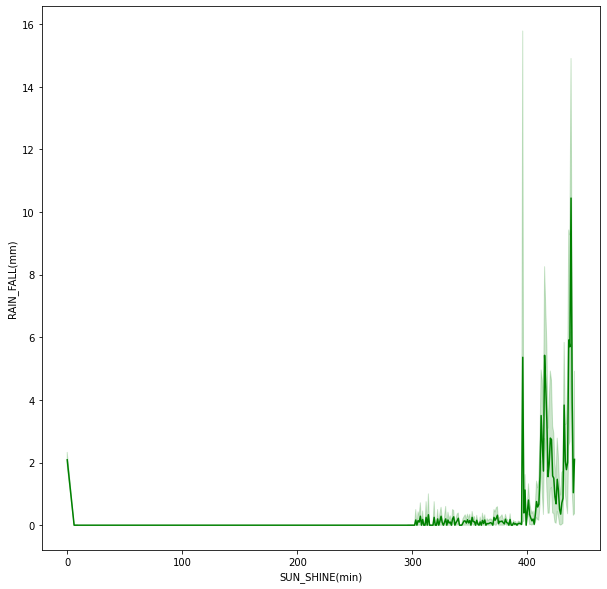

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x='SUN_SHINE(min)',color='green')

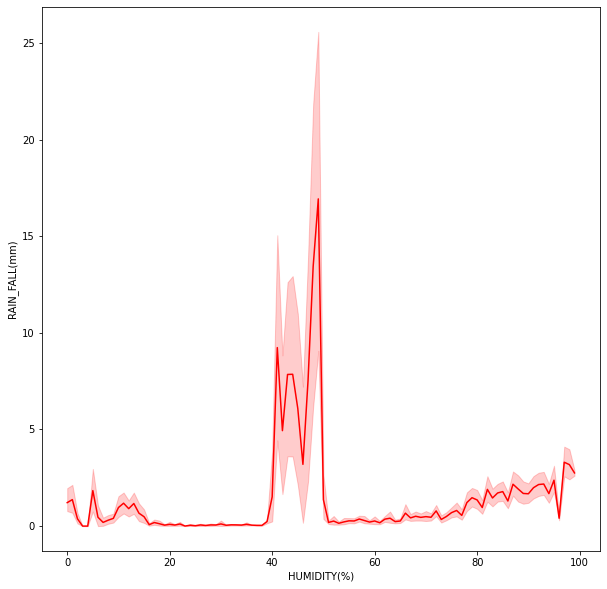

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x='HUMIDITY(%)',color='red')

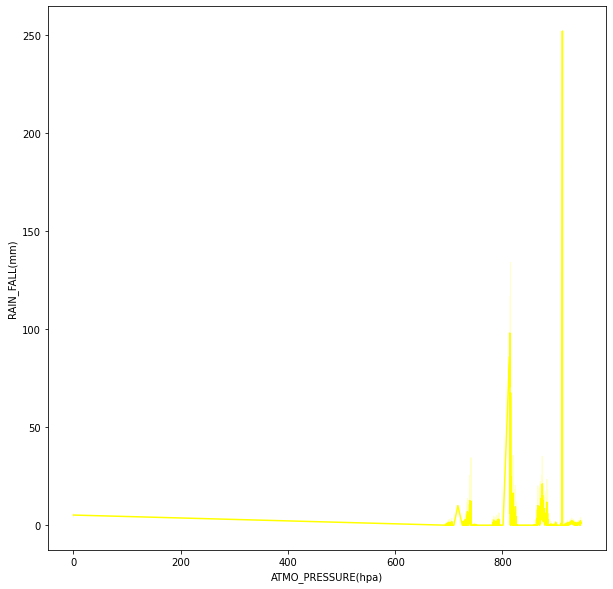

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x=	'ATMO_PRESSURE(hpa)',color='yellow')

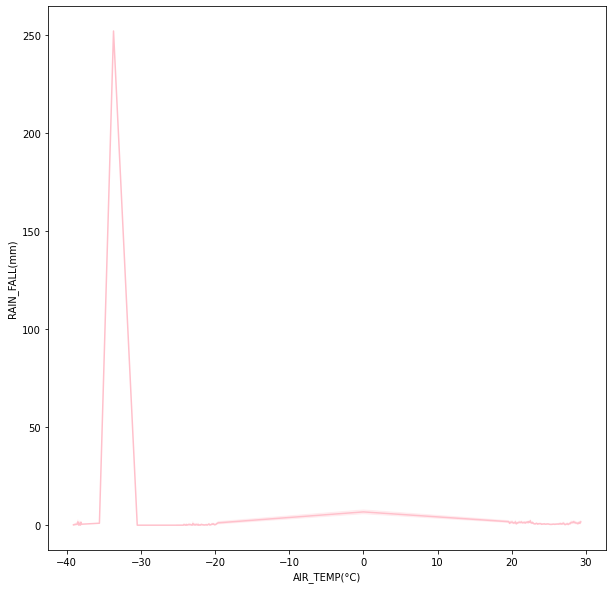

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x='AIR_TEMP(°C)',color='pink')

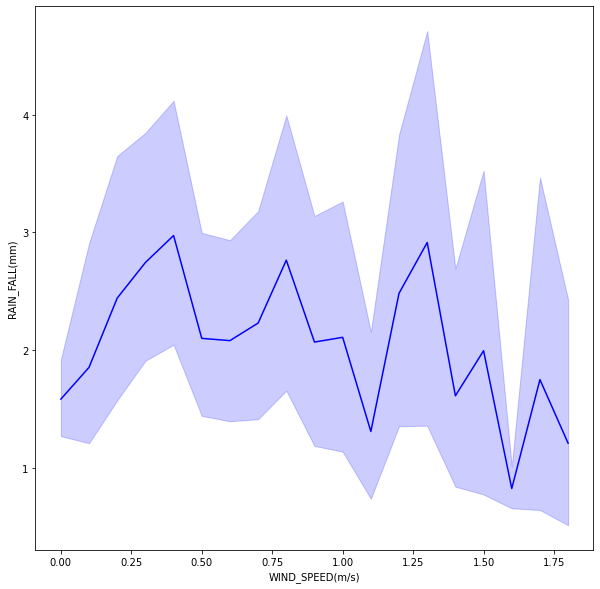

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x='WIND_SPEED(m/s)',color='blue')

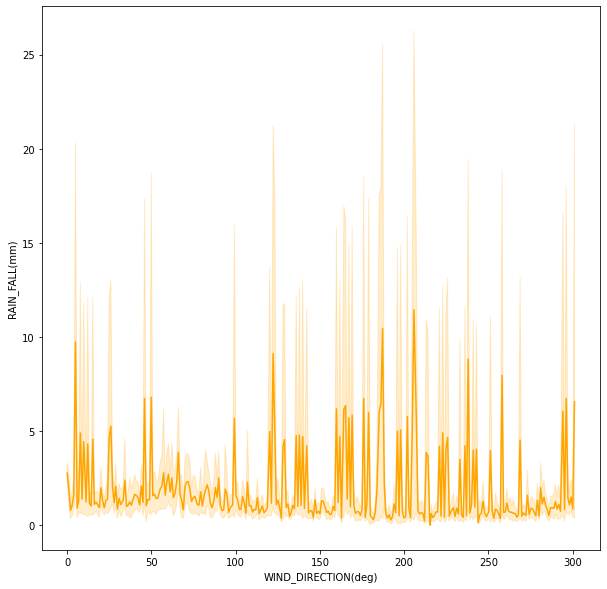

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='RAIN_FALL(mm)',x='WIND_DIRECTION(deg)',color='orange')

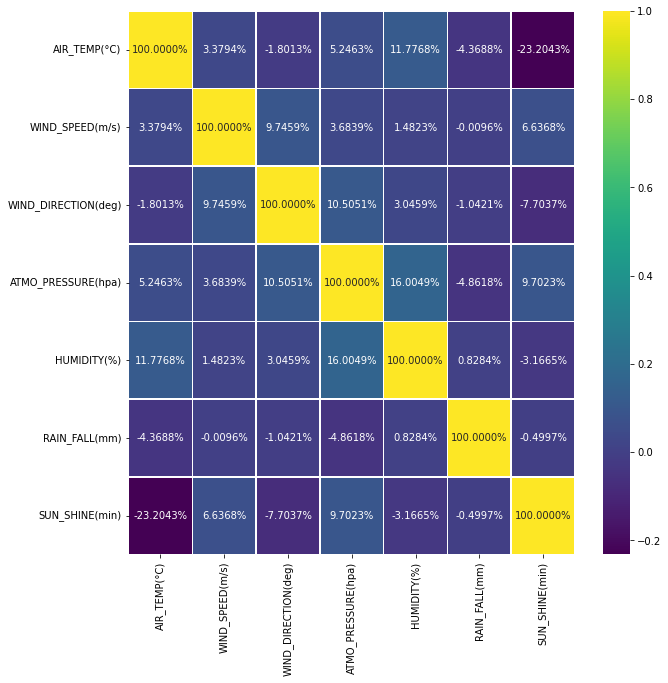

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.5, annot=True, fmt=".4%", cmap = 'viridis')